# Inverting and wrapping gates

In this section, I will show how to wrap collections of gates into a single operation for brevity. After this, we can represent the inverse of this operation and implement it easily.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
import qiskit_tools as qt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

Let's consider our quantum Fourier transform from the last notebook:

In [3]:
n = 5

xreg = QuantumRegister(n, 'x')
circ = QuantumCircuit(xreg)

circ = qt.QFT(circ, xreg)

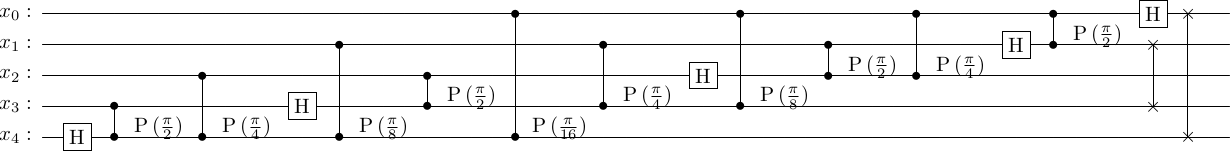

In [4]:
circ.draw(output="latex")

Again, we can save the matrix corresponding to this operation through:

In [5]:
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()
unit_mat = np.array(result.get_unitary(circ, decimals=5))

Now let's do the same again, but set `wrap=True`:

In [6]:
xreg = QuantumRegister(n, 'x')
circ = QuantumCircuit(xreg)

QFT_gate = qt.QFT(circ, xreg, wrap=True)
circ.append(QFT_gate, xreg);

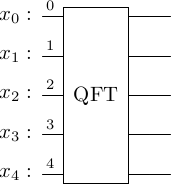

In [7]:
circ.draw(output="latex")

This operation is now represented in a single gate over the whole register and represented through the `QFT_gate` variable and `append`-ed to the circuit, rather than being applied straight to the circuit.

We can see that this is the same operation as before by comparing the output matrices:

In [8]:
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()
unit_mat_wrap = np.array(result.get_unitary(circ, decimals=5))

In [9]:
print(np.sum(np.abs(unit_mat-unit_mat_wrap)**2))

0.0


We see both are equal. 

Now let's see how to perform the inverse operation. To simply implement the inverse operation, the operation is wrapped and then inverted with `inverse=True`. Note that with `wrap=False` and `inverse=True` will still result in an inverted and wrapped operation.

In [10]:
xreg = QuantumRegister(n, 'x')
circ = QuantumCircuit(xreg)

QFT_gate = qt.QFT(circ, xreg, wrap=True)
circ.append(QFT_gate, xreg);

iQFT_gate = qt.QFT(circ, xreg, wrap=True, inverse=True)
circ.append(iQFT_gate, xreg);

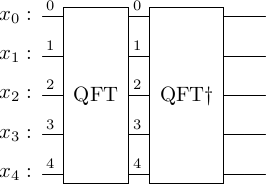

In [11]:
circ.draw(output="latex")

In [12]:
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()
unit_mat = np.array(result.get_unitary(circ, decimals=5))

By applying the inverse quantum Fourier transform after the quantum Fourier transform is first applied, the identity is returned:

In [13]:
print(np.sum(np.abs(unit_mat - np.eye(2**n))**2))

0.0
